In [1]:
import analysis
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt

In [2]:
df_All = analysis.getAllExperiments()

coriRange = list( range( 85, 235 ) ) + list( range( 330, 450 ) )
df_Cori = df_All.loc[ df_All[ 'Experiment' ].isin( coriRange ) ]

attawayRange = list( range( 235, 330 ) ) + list( range( 450, 550 ) )
df_Attaway = df_All.loc[ df_All[ 'Experiment' ].isin( attawayRange ) ]

In [3]:
df_Cori = df_Cori[(df_Cori['rabbit_workload'] == 0)]

df_Attaway = df_Attaway[(df_Attaway['rabbit_workload'] == 0)]

drop = []
for run in range(0, len(df_Attaway)):
    row = df_Attaway.iloc[run]
    
    if row['workload'] == 'hpcg' or row['workload'] == 'lammps':
        if row['stencil_size'] != 0:
            drop.append(run)

df_Attaway = df_Attaway.drop(df_Attaway.index[drop])
    
print("Number of Cori Runs:", len(df_Cori))
print("Number of Attaway Runs:", len(df_Attaway))

Number of Cori Runs: 467
Number of Attaway Runs: 330


In [ ]:
nodeset = set()
nodedict = dict()

for run in range(0, len(df_Cori)):
    data = analysis.getData(df_Cori.iloc[run])
    nodes =  data['node'].unique()
    
    
    for node in nodes:
        if node not in nodedict:
            nodedict[node] = 1
        else:
            nodedict[node] += 1
            
        nodeset.add(node)
    
    print("Run:", run, "\tNodeset Size:", len(nodeset))

print("Unique Cori Haswell Nodes:", len(nodeset), "/", 2388)

nodes_Cori = { int(k.replace('nid', '')): v for k, v in nodes_Cori.items() }

with open('Results/CoriNodes.dict', 'wb') as f:
    pickle.dump(nodedict, f, pickle.HIGHEST_PROTOCOL)

In [5]:
nodeset = set()
nodedict = dict()

for run in range(0, len(df_Attaway)):
    data = analysis.getData(df_Attaway.iloc[run])
    nodes =  data['node'].unique()
    
    for node in nodes:
        if node not in nodedict:
            nodedict[node] = 1
        else:
            nodedict[node] += 1
            
        nodeset.add(node)
        
    print("Run:", run, "\tNodeset Size:", len(nodeset))

print("Unique Attaway Xeon Gold Nodes:", len(nodeset), "/", 1488)

nodes_Attaway = { int(k.replace('swa', '')): v for k, v in nodes_Attaway.items() }

with open('Results/AttawayNodes.dict', 'wb') as f:
    pickle.dump(nodedict, f, pickle.HIGHEST_PROTOCOL)

Run: 0 	Nodeset Size: 8
Run: 1 	Nodeset Size: 8
Run: 2 	Nodeset Size: 8
Run: 3 	Nodeset Size: 8
Run: 4 	Nodeset Size: 8
Run: 5 	Nodeset Size: 8
Run: 6 	Nodeset Size: 8
Run: 7 	Nodeset Size: 8
Run: 8 	Nodeset Size: 8
Run: 9 	Nodeset Size: 8
Run: 10 	Nodeset Size: 8
Run: 11 	Nodeset Size: 8
Run: 12 	Nodeset Size: 8
Run: 13 	Nodeset Size: 8
Run: 14 	Nodeset Size: 8
Run: 15 	Nodeset Size: 8
Run: 16 	Nodeset Size: 8
Run: 17 	Nodeset Size: 8
Run: 18 	Nodeset Size: 16
Run: 19 	Nodeset Size: 16
Run: 20 	Nodeset Size: 16
Run: 21 	Nodeset Size: 16
Run: 22 	Nodeset Size: 16
Run: 23 	Nodeset Size: 16
Run: 24 	Nodeset Size: 16
Run: 25 	Nodeset Size: 16
Run: 26 	Nodeset Size: 16
Run: 27 	Nodeset Size: 16
Run: 28 	Nodeset Size: 16
Run: 29 	Nodeset Size: 16
Run: 30 	Nodeset Size: 16
Run: 31 	Nodeset Size: 16
Run: 32 	Nodeset Size: 16
Run: 33 	Nodeset Size: 16
Run: 34 	Nodeset Size: 16
Run: 35 	Nodeset Size: 16
Run: 36 	Nodeset Size: 16
Run: 37 	Nodeset Size: 16
Run: 38 	Nodeset Size: 16
Run: 39 	Nodes

Run: 301 	Nodeset Size: 312
Run: 302 	Nodeset Size: 312
Run: 303 	Nodeset Size: 312
Run: 304 	Nodeset Size: 312
Run: 305 	Nodeset Size: 312
Run: 306 	Nodeset Size: 312
Run: 307 	Nodeset Size: 312
Run: 308 	Nodeset Size: 312
Run: 309 	Nodeset Size: 312
Run: 310 	Nodeset Size: 319
Run: 311 	Nodeset Size: 319
Run: 312 	Nodeset Size: 319
Run: 313 	Nodeset Size: 319
Run: 314 	Nodeset Size: 319
Run: 315 	Nodeset Size: 319
Run: 316 	Nodeset Size: 319
Run: 317 	Nodeset Size: 319
Run: 318 	Nodeset Size: 319
Run: 319 	Nodeset Size: 319
Run: 320 	Nodeset Size: 319
Run: 321 	Nodeset Size: 319
Run: 322 	Nodeset Size: 319
Run: 323 	Nodeset Size: 319
Run: 324 	Nodeset Size: 319
Run: 325 	Nodeset Size: 319
Run: 326 	Nodeset Size: 319
Run: 327 	Nodeset Size: 319
Run: 328 	Nodeset Size: 319
Run: 329 	Nodeset Size: 319
Unique Attaway Xeon Gold Nodes: 319 / 1488


In [3]:
nodes_Cori = pickle.load( open( "Results/CoriNodes.dict", "rb" ) )
nodes_Attaway = pickle.load( open( "Results/AttawayNodes.dict", "rb" ) )

### Heat Map of Runs by Node ID on Cori

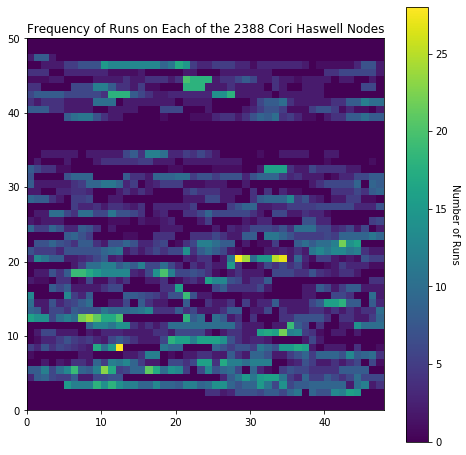

In [4]:
# for key, value in sorted(nodes_Cori.items(), key=lambda x: x[0]): 
#     print("{} : {}".format(key, value))

heatmap_cori = np.zeros((50, 48))
count = 0
for i in range(0, 50):
    for j in range(0, 48):
        
        nid = 48 * i + j
        
        if nid <= 1677:
            nid = nid + 627
        elif nid > 1677:
            nid = nid + 10795
        
        if nid in nodes_Cori:
            count = count + 1

            heatmap_cori[i, j] = nodes_Cori[nid]
        else:
            heatmap_cori[i, j] = 0
            
# print(count)  

plt.figure(figsize=(8, 8))
plt.title('Frequency of Runs on Each of the 2388 Cori Haswell Nodes')
plt.imshow(heatmap_cori, cmap='hot', interpolation='nearest')
plt.xlim([0, 48])
plt.ylim([0, 50])
cbar = plt.colorbar(plt.pcolor(heatmap_cori))
_ = cbar.ax.set_ylabel('Number of Runs', rotation=270, labelpad=12)

plt.savefig('Figures/CoriCoverage.png')

### Heat Map of Runs by Node ID on Attaway

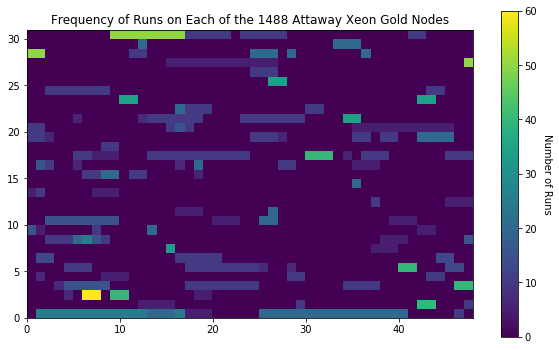

In [5]:
# for key, value in sorted(nodes_Attaway.items(), key=lambda x: x[0]): 
#     print("{} : {}".format(key, value))

heatmap_attaway = np.zeros((31, 48))
count = 0
for i in range(0, 31):
    for j in range(0, 48):
        
        nid = 48 * i + j
        
        if nid in nodes_Attaway:
            count = count + 1

            heatmap_attaway[i, j] = nodes_Attaway[nid]
        else:
            heatmap_attaway[i, j] = 0
            
# print(count)  

plt.figure(figsize=(10, 6))
plt.title('Frequency of Runs on Each of the 1488 Attaway Xeon Gold Nodes')
plt.imshow(heatmap_attaway, cmap='hot', interpolation='nearest')
plt.xlim([0, 48])
plt.ylim([0, 31])
cbar = plt.colorbar(plt.pcolor(heatmap_attaway))
_ = cbar.ax.set_ylabel('Number of Runs', rotation=270, labelpad=15)

plt.savefig('Figures/AttawayCoverage.png')

### Iteration Time (Workload_Usec) of Attaway DGemm Run

In [6]:
df_Cori_Dgemm = df_Cori[(df_Cori['workload'] == 'dgemm') & (df_Cori['stencil_size'] == 0) & (df_Cori['processors'] == 2048)]
dgemm_data = analysis.getData(df_Cori_Dgemm.iloc[1])

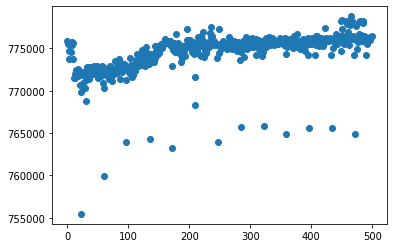

In [128]:
rankData = dgemm_data[(dgemm_data['rank']==0)]
plt.plot(rankData['iteration'], rankData['workload_usec'], 'o')

### Iteration Time (Workload_Usec) of Attaway DGemm Run

In [8]:
df_Attaway_Dgemm = df_Attaway[(df_Attaway['workload'] == 'dgemm') & (df_Attaway['stencil_size'] == 0) & (df_Attaway['processors'] == 1024)]

dgemm_data = analysis.getData(df_Attaway_Dgemm.iloc[1])

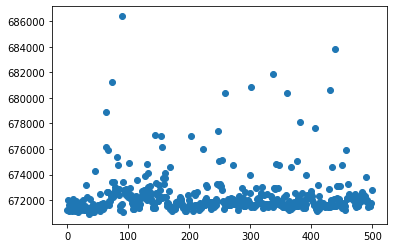

In [140]:
rankData = dgemm_data[(dgemm_data['rank']==23)]
plt.plot(rankData['iteration'], rankData['workload_usec'], 'o')

### Barrier Time (Interval Max - Workload Max) of Cori DGemm Run

In [21]:
dgemm_data_Cori = analysis.getData(df_Cori_Dgemm.iloc[1])
dgemm_data_Cori = dgemm_data_Cori[dgemm_data_Cori['rank']==0]

dgemm_data_Attaway = analysis.getData(df_Attaway_Dgemm.iloc[1])
dgemm_data_Attaway = dgemm_data_Attaway[dgemm_data_Attaway['rank']==0]

837642.401056
819468.3480880001
71.71574799999688
15.310078000003704


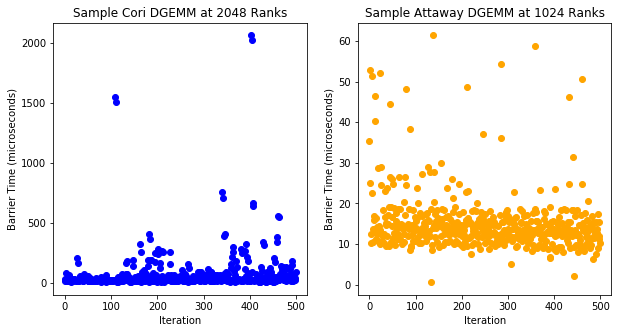

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].plot(dgemm_data_Cori['iteration'], abs(dgemm_data_Cori['interval_max_usec'] - dgemm_data_Cori['workload_max_usec']), 'o', color='blue')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Barrier Time (microseconds)')
axs[0].set_title('Sample Cori DGEMM at 2048 Ranks')

axs[1].plot(dgemm_data_Attaway['iteration'], abs(dgemm_data_Attaway['interval_max_usec'] - dgemm_data_Attaway['workload_max_usec']), 'o', color='orange')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Barrier Time (microseconds)')
axs[1].set_title('Sample Attaway DGEMM at 1024 Ranks')

plt.savefig('Figures/Validation.png', bbox_inches='tight')

print(np.mean(abs(dgemm_data_Cori['interval_max_usec'])))
print(np.mean(abs(dgemm_data_Attaway['interval_max_usec'])))
print(np.mean(abs(dgemm_data_Cori['interval_max_usec'] - dgemm_data_Cori['workload_max_usec'])))
print(np.mean(abs(dgemm_data_Attaway['interval_max_usec'] - dgemm_data_Attaway['workload_max_usec'])))

### Barrier Time (Interval Max - Workload Max) of Attaway DGemm Run

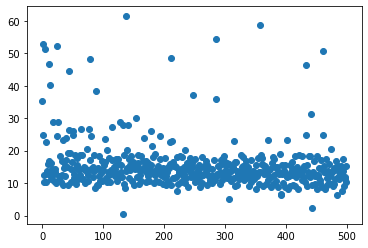

In [146]:
plt.plot(dgemm_data['iteration'], abs(dgemm_data['interval_max_usec'] - dgemm_data['workload_max_usec']), 'o')